<a href="https://colab.research.google.com/github/intheblueside/spotify-popularity/blob/main/LinearRegressionDMW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('dataset_afterCleaning.csv')
data.head()

,track_id,artists,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,time_signature,explicit_encoded,track_genre_encoded,intensity,liveliness,grooviness
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,1.728257,0.189645,0.597905,-0.879549,-1.210910,0.142555,-1.367606,1.647794,...,-0.293978,1.067265,0.806275,-1.171010,0.0,-0.335674,-0.621248,0.713317,-0.185137,-0.266391
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,0.919403,-1.065350,-1.023709,-2.187129,-1.210910,-2.938252,0.731205,0.158913,...,-0.293735,-0.708863,-1.022838,-1.521623,0.0,-0.335674,-0.621248,0.879661,-1.415138,-2.245726
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,1.009275,-0.117539,-0.909690,-1.331662,-1.492264,-0.735074,0.731205,-0.300921,...,-0.294031,-0.598287,-1.623016,-1.560524,0.0,-0.335674,-0.621248,0.456278,-0.048836,-1.541566
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,1.638384,-0.255230,-1.999212,-2.658745,-1.492264,-3.043697,0.731205,-0.733969,...,-0.290263,-0.494622,-1.529110,1.983533,0.0,-0.335674,-0.621248,2.090942,-0.240110,-3.174164
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,2.132684,-0.302918,0.230508,-0.959334,-0.929557,-0.719507,0.731205,-0.370119,...,-0.294031,-0.833952,-1.431122,-0.094021,0.0,-0.335674,-0.621248,-0.074492,-0.838419,-0.742958


# Selecting Numerical Features for the Model

In [ ]:
data= data.drop(columns=['track_id', 'artists', 'time_signature'])

In [ ]:
X = data.select_dtypes(include='number').drop(columns=['popularity'])
y = data['popularity']
data.head()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,explicit_encoded,track_genre_encoded,intensity,liveliness,grooviness
0,1.728257,0.189645,0.597905,-0.879549,-1.210910,0.142555,-1.367606,1.647794,-0.886788,-0.293978,1.067265,0.806275,-1.171010,-0.335674,-0.621248,0.713317,-0.185137,-0.266391
1,0.919403,-1.065350,-1.023709,-2.187129,-1.210910,-2.938252,0.731205,0.158913,1.994013,-0.293735,-0.708863,-1.022838,-1.521623,-0.335674,-0.621248,0.879661,-1.415138,-2.245726
2,1.009275,-0.117539,-0.909690,-1.331662,-1.492264,-0.735074,0.731205,-0.300921,-0.312437,-0.294031,-0.598287,-1.623016,-1.560524,-0.335674,-0.621248,0.456278,-0.048836,-1.541566
3,1.638384,-0.255230,-1.999212,-2.658745,-1.492264,-3.043697,0.731205,-0.733969,1.932636,-0.290263,-0.494622,-1.529110,1.983533,-0.335674,-0.621248,2.090942,-0.240110,-3.174164
4,2.132684,-0.302918,0.230508,-0.959334,-0.929557,-0.719507,0.731205,-0.370119,0.524216,-0.294031,-0.833952,-1.431122,-0.094021,-0.335674,-0.621248,-0.074492,-0.838419,-0.742958


# Linear Regression Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
X_train_clean = X_train.dropna()
y_train_clean = y_train[X_train_clean.index]
model.fit(X_train_clean, y_train_clean)

y_pred = model.predict(X_test)

# model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.9503913964088455
R-squared: 0.041603325999870044


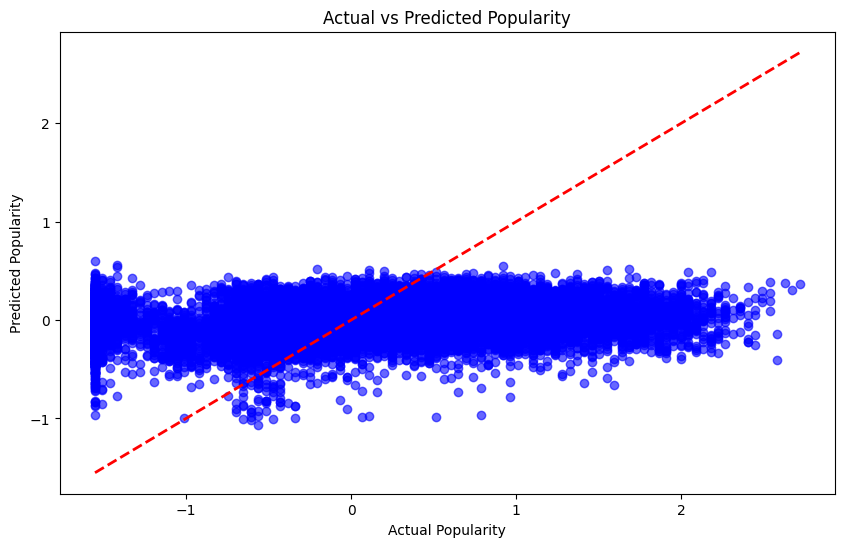

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs Predicted Popularity')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.show()

# Hyperparameter Tuning using Lasso and Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train_imputed = imputer.fit_transform(X_train)

X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}

ridge = Ridge()
ridge_grid = GridSearchCV(ridge, param_grid, cv=5, scoring="neg_mean_squared_error")
ridge_grid.fit(X_train_scaled, y_train)

lasso = Lasso()
lasso_grid = GridSearchCV(lasso, param_grid, cv=5, scoring="neg_mean_squared_error")
lasso_grid.fit(X_train_scaled, y_train)

ridge_best_params = ridge_grid.best_params_  # Best alpha for Ridge
lasso_best_params = lasso_grid.best_params_  # Best alpha for Lasso

print(f'Best alpha for Ridge: {ridge_best_params}')
print(f'Best alpha for Lasso: {lasso_best_params}')


Best alpha for Ridge: {'alpha': 10.0}
Best alpha for Lasso: {'alpha': 0.01}


In [ ]:
ridge = Ridge(alpha=10.0)  # Best alpha for Ridge
lasso = Lasso(alpha=0.01)  # Best alpha for Lasso

ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

#predict with the test set
ridge_pred = ridge.predict(X_test_scaled)
lasso_pred = lasso.predict(X_test_scaled)

ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print(f'Ridge Regression: MSE = {ridge_mse}, R^2 = {ridge_r2}')
print(f'Lasso Regression: MSE = {lasso_mse}, R^2 = {lasso_r2}')

Ridge Regression: MSE = 0.950398679550488, R^2 = 0.04159598151132271
Lasso Regression: MSE = 0.957647017274097, R^2 = 0.03428659004104451


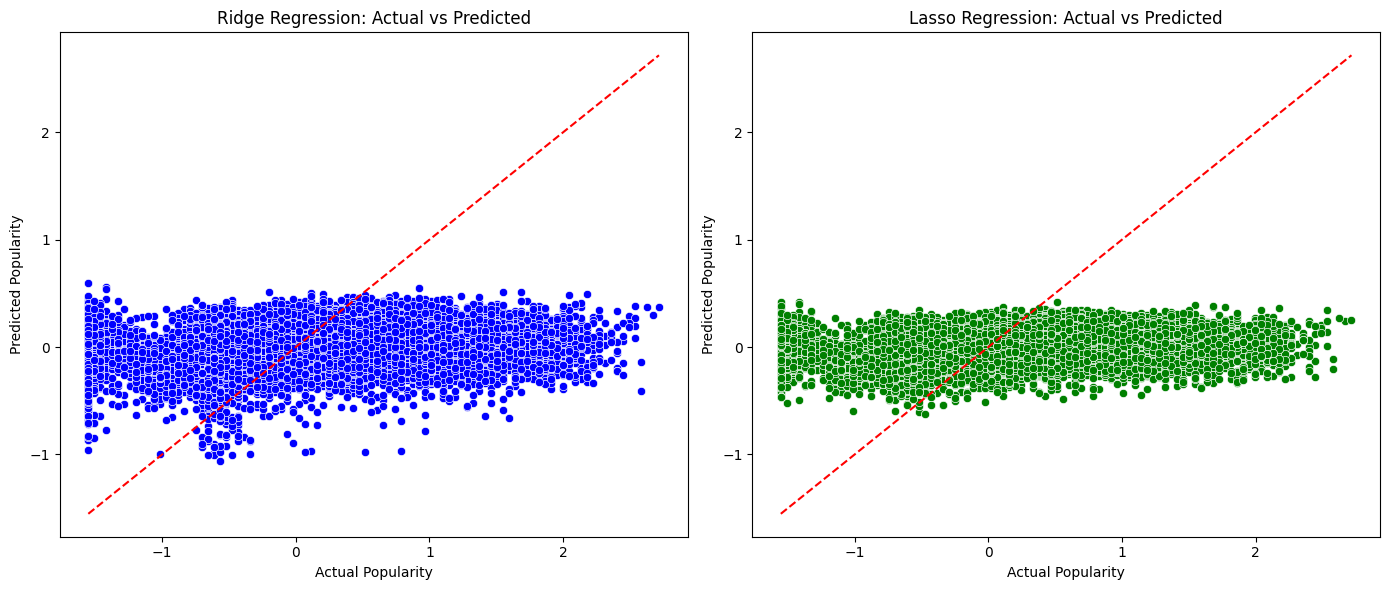

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x=y_test, y=ridge_pred, ax=axes[0], color='blue')
axes[0].set_title('Ridge Regression: Actual vs Predicted')
axes[0].set_xlabel('Actual Popularity')
axes[0].set_ylabel('Predicted Popularity')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

sns.scatterplot(x=y_test, y=lasso_pred, ax=axes[1], color='green')
axes[1].set_title('Lasso Regression: Actual vs Predicted')
axes[1].set_xlabel('Actual Popularity')
axes[1].set_ylabel('Predicted Popularity')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.tight_layout()
plt.show()

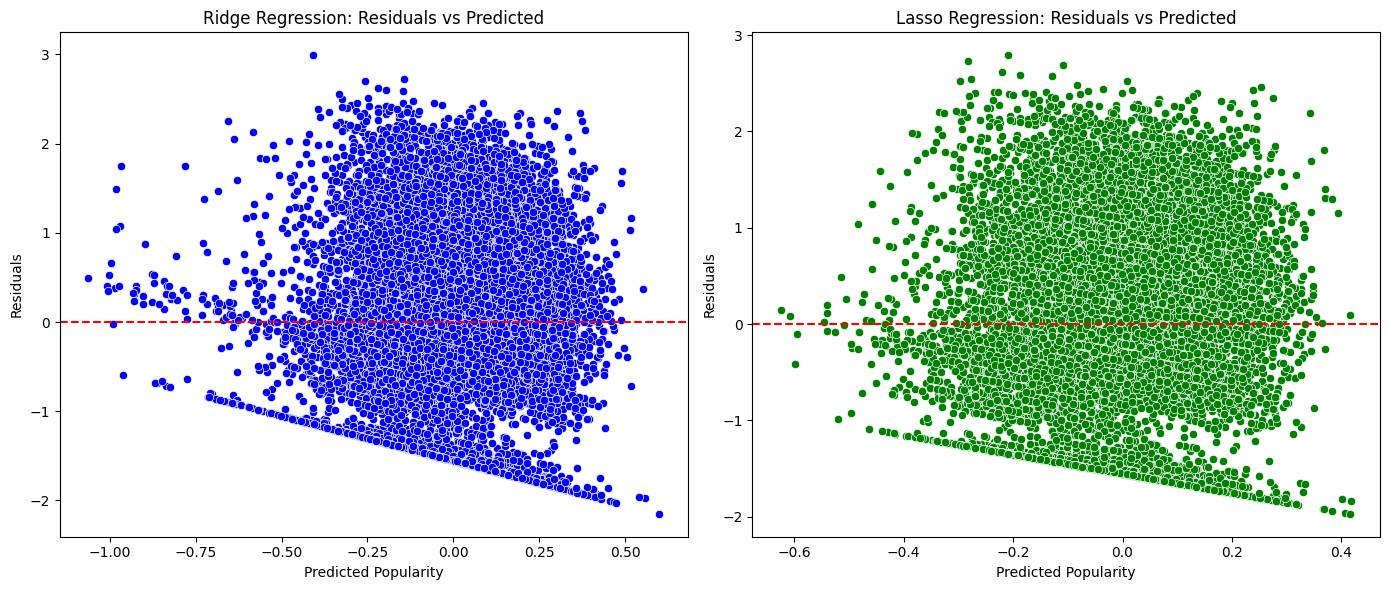

In [ ]:
ridge_residuals = y_test - ridge_pred
lasso_residuals = y_test - lasso_pred

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x=ridge_pred, y=ridge_residuals, ax=axes[0], color='blue')
axes[0].set_title('Ridge Regression: Residuals vs Predicted')
axes[0].set_xlabel('Predicted Popularity')
axes[0].set_ylabel('Residuals')
axes[0].axhline(y=0, color='red', linestyle='--')

sns.scatterplot(x=lasso_pred, y=lasso_residuals, ax=axes[1], color='green')
axes[1].set_title('Lasso Regression: Residuals vs Predicted')
axes[1].set_xlabel('Predicted Popularity')
axes[1].set_ylabel('Residuals')
axes[1].axhline(y=0, color='red', linestyle='--')

plt.tight_layout()
plt.show()

In [ ]:
# save models
import pickle

with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('ridge_model.pkl', 'wb') as f:
    pickle.dump(ridge, f)

with open('lasso_model.pkl', 'wb') as f:
    pickle.dump(lasso, f)

# AutoML & H2O

In [ ]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=e68564d7193a4a9b66a94f74fa6ee9ab0644620e549e21776898a172570be4de
  Stored in directory: /root/.cache/pip/wheels/0c/95/eb/b449c73f478dbc4557b80170cf7f2aa6db15862877e9a63536
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.25" 2024-10-15; OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpchzum5hl
  JVM stdout: /tmp/tmpchzum5hl/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpchzum5hl/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,2 months and 9 days
H2O_cluster_name:,H2O_from_python_unknownUser_jvl8gr
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
h2o_data = h2o.H2OFrame(data)

target = 'popularity'
predictors = [col for col in h2o_data.columns if col != target]

# Split the data into train and test sets
train, test = h2o_data.split_frame(ratios=[0.8], seed=42)

# Run H2O AutoML
aml = H2OAutoML(max_runtime_secs=300, seed=42)
aml.train(x=predictors, y=target, training_frame=train)

# View AutoML leaderboard
lb = aml.leaderboard
print(lb)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                    rmse       mse       mae    rmsle    mean_residual_deviance
StackedEnsemble_AllModels_2_AutoML_1_20250111_54934     0.843547  0.711572  0.626756      nan                  0.711572
StackedEnsemble_AllModels_1_AutoML_1_20250111_54934     0.844337  0.712906  0.628174      nan                  0.712906
StackedEnsemble_BestOfFamily_3_AutoML_1_20250111_54934  0.850765  0.723801  0.63252       nan                  0.723801
StackedEnsemble_BestOfFamily_2_AutoML_1_20250111_54934  0.852321  0.726451  0.635114      nan                  0.726451
StackedEnsemble_BestOfFamily_1_AutoML_1_20250111_54934  0.858466  0.736963  0.652782      nan                  0.736963
GBM_4_AutoML_1_20250111_54934                           0.865525  0.749134  0.652403      

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
<ipython-input-10-76e046792d26>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="rmse", y="model_id", data=lb_df, palette="viridis")


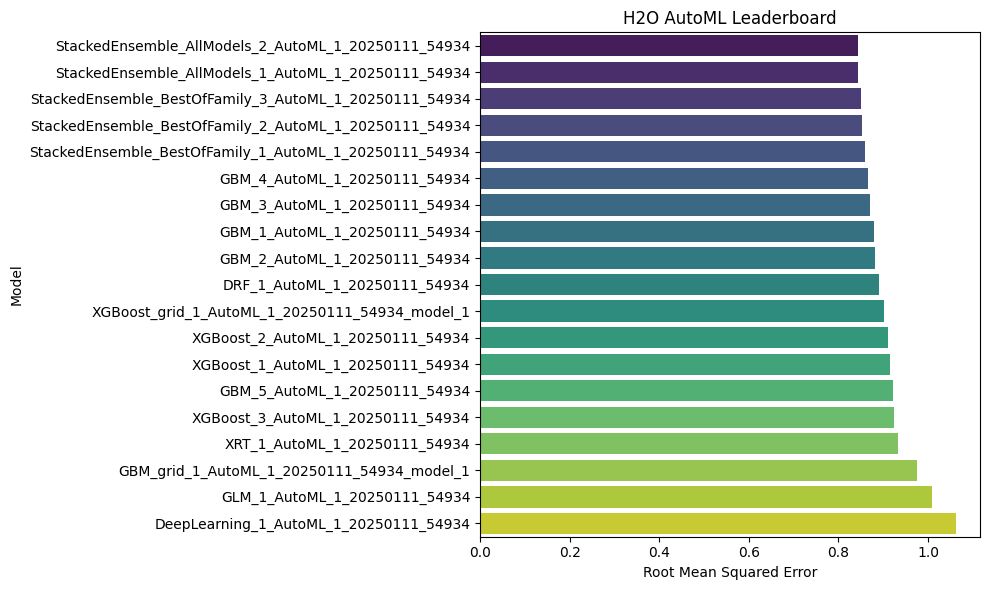

In [ ]:
#convert leaderboard to pandas
lb_df = lb.as_data_frame()

plt.figure(figsize=(10, 6))
sns.barplot(x="rmse", y="model_id", data=lb_df, palette="viridis")
plt.xlabel("Root Mean Squared Error")
plt.ylabel("Model")
plt.title("H2O AutoML Leaderboard")
plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the best model on the test set
perf = aml.leader.model_performance(test)
print(perf)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.7087998207608432
RMSE: 0.8419025007450941
MAE: 0.6267301762787232
RMSLE: NaN
Mean Residual Deviance: 0.7087998207608432
R^2: 0.3401290091108944
Null degrees of freedom: 4650
Residual degrees of freedom: 4642
Null deviance: 4998.414744389142
Residual deviance: 3296.627966358682
AIC: 11618.175137295111


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


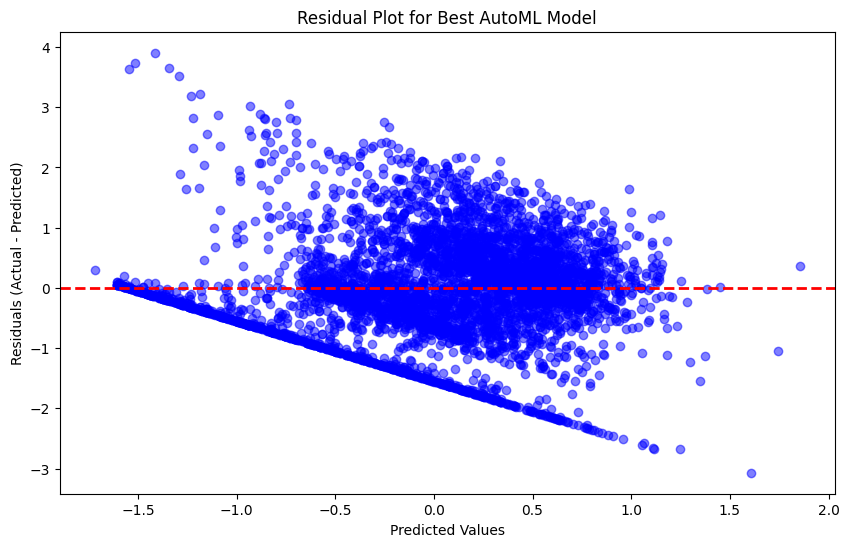

In [ ]:
best_model = aml.leader
predictions = best_model.predict(test)

#combining test data with predictions
pred_df = test.cbind(predictions)

# convert H2O to pandas to plot
pred_df = pred_df.as_data_frame()

plt.figure(figsize=(10, 6))
plt.scatter(pred_df['predict'], pred_df[target] - pred_df['predict'], alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot for Best AutoML Model")
plt.show()


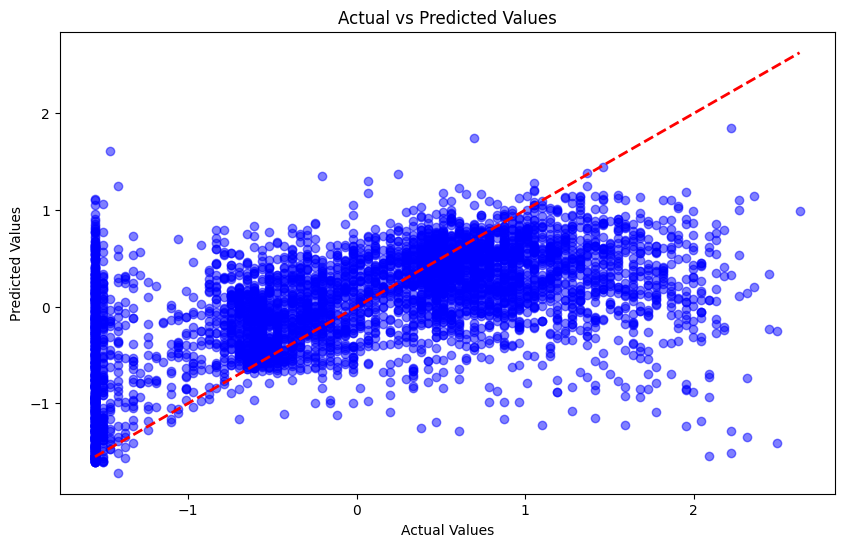

In [ ]:
# Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(pred_df[target], pred_df['predict'], alpha=0.5, color='blue')
plt.plot([pred_df[target].min(), pred_df[target].max()],
         [pred_df[target].min(), pred_df[target].max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [ ]:
import pickle

In [ ]:
with open("linear_reg.pkl", "wb") as file:
    pickle.dump(model, file)

In [ ]:
# save in colab
local_model_path = '/content/automl_model/'

model_path = h2o.save_model(model=aml.leader, path=local_model_path, force=True)
print(f"Model saved to Colab session at: {model_path}")

Model saved to Colab session at: /content/automl_model/StackedEnsemble_AllModels_2_AutoML_1_20250111_54934


In [ ]:
import shutil

# zip file
shutil.make_archive('/content/automl_model_backup', 'zip', '/content/automl_model/')

# download to local device
from google.colab import files
files.download('/content/automl_model_backup.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>